# Notebook Prentrega 2 del Grupo 1

                                    Tema: Defunciones en Argentina

Integrantes del Grupo: - Antonella Arcuri
                       - Daniela Araujo
                       - Maria Candela Herrera
                       - Ana Clara Sanchez
Dataset obtenido de: http://datos.salud.gob.ar/dataset/datos-salud-gob-ar-dataset-defunciones-mensuales-ocurridas-en-la-republica-argentina

Tipo de archivo: csv

Objetivo planteado: Analizar fallecimientos en Argentina entre los años 2015 y 2021

In [2]:
# Importar librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [3]:
#Leer archivo del data set
defunciones = pd.read_csv('arg_def_15_21.csv')

In [4]:
# Chequeamos que leyó el archivo
defunciones.head()

,region,jurisdiccion,mes_anio_defuncion,mes_def,anio_def,sexo_id,sexo_nombre,grupo_etario,grupo_causa_defuncion_CIE10,cod_causa_muerte_CIE10,cantidad
0,1.Centro,6.Prov. Bs.As.,09/2015,9,2015,1,1.Varones,01.menor a 20 anios,1500 AFECC PERINATALES,P21,1
1,1.Centro,6.Prov. Bs.As.,09/2015,9,2015,1,1.Varones,01.menor a 20 anios,"1600 MALFORM CONGENITAS, DEFORM Y ANOM CROM...",Q60,1
2,1.Centro,6.Prov. Bs.As.,08/2015,8,2015,1,1.Varones,01.menor a 20 anios,"1600 MALFORM CONGENITAS, DEFORM Y ANOM CROM...",Q24,1
3,1.Centro,6.Prov. Bs.As.,05/2015,5,2015,1,1.Varones,01.menor a 20 anios,1000 ENF SISTEMA RESPIRATORIO,J18,1
4,1.Centro,6.Prov. Bs.As.,10/2015,10,2015,1,1.Varones,01.menor a 20 anios,1500 AFECC PERINATALES,P36,1


In [5]:
# Revisar tipo de datos en el dataset
defunciones.dtypes

region                         object
jurisdiccion                   object
mes_anio_defuncion             object
mes_def                         int64
anio_def                        int64
sexo_id                         int64
sexo_nombre                    object
grupo_etario                   object
grupo_causa_defuncion_CIE10    object
cod_causa_muerte_CIE10         object
cantidad                        int64
dtype: object

In [6]:
# Chequear cantidad de datos en el dataset
tamaño=defunciones.shape
print("El dataset cuenta con ", tamaño, "siendo el primer campo filas y el segundo columnas")

El dataset cuenta con  (2516784, 11) siendo el primer campo filas y el segundo columnas


In [7]:
#Asigno variable al total de filas y de columnas
num_filas,num_columnas=defunciones.shape
print( f"El dataset tiene {num_filas} filas en total y tiene {num_columnas} columnas")

El dataset tiene 2516784 filas en total y tiene 11 columnas


In [8]:
# Revisar si existen datos faltantes en el dataset
valores_faltantes=defunciones.isnull().sum()
print(valores_faltantes)

# No hay datos faltante

region                         0
jurisdiccion                   0
mes_anio_defuncion             0
mes_def                        0
anio_def                       0
sexo_id                        0
sexo_nombre                    0
grupo_etario                   0
grupo_causa_defuncion_CIE10    0
cod_causa_muerte_CIE10         0
cantidad                       0
dtype: int64


In [9]:
#Datos con NA

defunciones.isna().sum()

region                         0
jurisdiccion                   0
mes_anio_defuncion             0
mes_def                        0
anio_def                       0
sexo_id                        0
sexo_nombre                    0
grupo_etario                   0
grupo_causa_defuncion_CIE10    0
cod_causa_muerte_CIE10         0
cantidad                       0
dtype: int64

In [10]:
# RENOMBRAR COLUMNAS 


In [11]:
defunciones.rename(columns={'grupo_causa_defuncion_CIE10': 'causa_defuncion', 'cod_causa_muerte_CIE10': 'cod_causa_muerte'}, inplace=True)

In [12]:
defunciones.columns

Index(['region', 'jurisdiccion', 'mes_anio_defuncion', 'mes_def', 'anio_def',
       'sexo_id', 'sexo_nombre', 'grupo_etario', 'causa_defuncion',
       'cod_causa_muerte', 'cantidad'],
      dtype='object')

In [13]:
# Filtrar cantidad de datos por año


In [14]:
def_anio=defunciones['anio_def'].value_counts()

In [15]:
print(def_anio)

2021    432242
2020    377592
2016    352506
2017    342344
2019    341057
2018    337600
2015    333443
Name: anio_def, dtype: int64


In [16]:
# Filtrar categorias de la variable jurisdiccion


In [17]:
defunciones['jurisdiccion'].unique()

array(['6.Prov. Bs.As.', '2.CABA', '99.no identificado.', '14.Cordoba.',
       '82.Santa Fe.', '54.Misiones.', '22.Chaco.', '90.Tucuman.',
       '18.Corrientes.', '30.Entre Rios.', '34.Formosa.', '50.Mendoza.'],
      dtype=object)

In [18]:
# ver cantidad de ''99 no identificado' de la variable jurisdiccion por año


In [19]:
juris_99=defunciones[defunciones['jurisdiccion'] == '99.no identificado.']['anio_def'].value_counts()

In [20]:
print(juris_99)

2021    65963
2020    57838
2016    50156
2018    49802
2019    49610
2017    49278
2015    46925
Name: anio_def, dtype: int64


In [21]:
# ver porcentaje de ''99 no identificado' sobre el total de datos de la variable jurisdiccion


In [22]:
porc_99_jurisd=(juris_99/def_anio)*100

In [23]:
print (porc_99_jurisd)

2015    14.072870
2016    14.228410
2017    14.394293
2018    14.751777
2019    14.545956
2020    15.317591
2021    15.260664
Name: anio_def, dtype: float64


In [24]:
# promedio de '99 no identificado'

In [25]:
porc_99_jurisd.mean()

14.653080333352424

In [26]:
# Filtrar categorias, cantidad y datos sin espeficficar de la variable rango etario

In [27]:
defunciones['grupo_etario'].unique()

array(['01.menor a 20 anios', '05.de 60 a 69 anios',
       '03.de 40 a 49 anios', '02.de 20 a 39 anios',
       '04.de 50 a 59 anios', '07. de 80 anios y mas',
       '06.de 70 a 79 anios', '08.sin especificar'], dtype=object)

In [28]:
defunciones['grupo_etario'].value_counts()

07. de 80 anios y mas    997080
06.de 70 a 79 anios      592922
05.de 60 a 69 anios      416732
04.de 50 a 59 anios      209595
02.de 20 a 39 anios      107111
03.de 40 a 49 anios      103711
01.menor a 20 anios       75626
08.sin especificar        14007
Name: grupo_etario, dtype: int64

In [29]:
etario_08=defunciones[defunciones['grupo_etario'] == '08.sin especificar']['anio_def'].value_counts()

In [30]:
print(etario_08)

2020    2949
2019    2012
2017    1942
2018    1907
2016    1784
2021    1715
2015    1698
Name: anio_def, dtype: int64


In [31]:
# Ver datos de la variable Causa de Defuncion

In [32]:
defunciones['causa_defuncion'].value_counts()


0900 ENF  DEL SISTEMA CIRCULATORIO                                 692307
0200 T MALIGNOS                                                    429719
1000 ENF SISTEMA RESPIRATORIO                                      427872
0100 CIERTAS ENF INFECCIOSAS Y PARASITARIAS                        236544
1900 SIGNOS, SINTOMAS Y AFECCIONES MAL DEFINIDAS Y DESCONOCIDAS    156731
1700 CAUSAS EXTERNAS                                               129363
1800 DEMAS CAUSAS DEFINIDAS                                        123220
1300 ENF  DEL SISTEMA URINARIO                                      92111
0300 DIABETES MELLITUS                                              65723
1200 ENF  DEL HIGADO                                                40021
1500 AFECC  PERINATALES                                             21169
0299 C IN SITU, TUM BEN  Y COMP INCIERTO                            19502
0800 TRASTORNOS MENTALES Y DEL COMP                                 18839
0500 TRAST METABOLICOS                

In [33]:
top_causas=defunciones['causa_defuncion'].value_counts().head(5)
print(top_causas)

0900 ENF  DEL SISTEMA CIRCULATORIO                                 692307
0200 T MALIGNOS                                                    429719
1000 ENF SISTEMA RESPIRATORIO                                      427872
0100 CIERTAS ENF INFECCIOSAS Y PARASITARIAS                        236544
1900 SIGNOS, SINTOMAS Y AFECCIONES MAL DEFINIDAS Y DESCONOCIDAS    156731
Name: causa_defuncion, dtype: int64


In [34]:
max_causa=defunciones['causa_defuncion'].value_counts().max()
print( f"La causa que registra mayor cantidad de defunciones corresponde a ENFERMEDADES DEL SISTEMA CIRCULATORIO con {max_causa} muertes")

La causa que registra mayor cantidad de defunciones corresponde a ENFERMEDADES DEL SISTEMA CIRCULATORIO con 692307 muertes


In [35]:
top_min_causas=defunciones['causa_defuncion'].value_counts().tail(5)
print(top_min_causas)

1100 APEND , HERNIA CAV  ABDOM Y OBSTR  INTEST     13125
0700 ENF  DE ALZHEIMER                             10370
0400 DEF  Y ANEMIAS NUTRICION                       6012
1400 EMBARAZO, PARTO Y PUERPERIO                    2122
0600 MENINGITIS                                     1993
Name: causa_defuncion, dtype: int64


In [36]:
min_causas=defunciones['causa_defuncion'].value_counts().min()
print( f"La causa que registra menor cantidad de defunciones corresponde a MENINGITIS con {min_causas} muertes")

La causa que registra menor cantidad de defunciones corresponde a MENINGITIS con 1993 muertes


In [37]:
defunciones.groupby(['grupo_etario'])['causa_defuncion'].value_counts()

grupo_etario         causa_defuncion                                       
01.menor a 20 anios  1500 AFECC  PERINATALES                                   21169
                     1700 CAUSAS EXTERNAS                                      16411
                     1600 MALFORM  CONGENITAS, DEFORM  Y ANOM  CROMOSOMICAS    13566
                     1000 ENF SISTEMA RESPIRATORIO                              5192
                     1800 DEMAS CAUSAS DEFINIDAS                                4229
                                                                               ...  
08.sin especificar   0800 TRASTORNOS MENTALES Y DEL COMP                          60
                     0400 DEF  Y ANEMIAS NUTRICION                                37
                     0700 ENF  DE ALZHEIMER                                       32
                     0600 MENINGITIS                                              13
                     1600 MALFORM  CONGENITAS, DEFORM  Y ANOM  CROMOSOMICA

In [38]:
defunciones.groupby(['anio_def'])['causa_defuncion'].value_counts()

anio_def  causa_defuncion                                                
2015      0900 ENF  DEL SISTEMA CIRCULATORIO                                 96225
          0200 T MALIGNOS                                                    62572
          1000 ENF SISTEMA RESPIRATORIO                                      56954
          1700 CAUSAS EXTERNAS                                               20377
          1900 SIGNOS, SINTOMAS Y AFECCIONES MAL DEFINIDAS Y DESCONOCIDAS    19592
                                                                             ...  
2021      1600 MALFORM  CONGENITAS, DEFORM  Y ANOM  CROMOSOMICAS              1567
          0700 ENF  DE ALZHEIMER                                              1489
          0400 DEF  Y ANEMIAS NUTRICION                                        845
          1400 EMBARAZO, PARTO Y PUERPERIO                                     475
          0600 MENINGITIS                                                      238
Name: causa_d

In [39]:
defunciones.groupby(['sexo_nombre'])['causa_defuncion'].value_counts()

sexo_nombre        causa_defuncion                                       
1.Varones          0900 ENF  DEL SISTEMA CIRCULATORIO                        343259
                   0200 T MALIGNOS                                           220729
                   1000 ENF SISTEMA RESPIRATORIO                             206773
                   0100 CIERTAS ENF INFECCIOSAS Y PARASITARIAS               128180
                   1700 CAUSAS EXTERNAS                                       95206
                                                                              ...  
9.Sin especificar  1500 AFECC  PERINATALES                                       28
                   0400 DEF  Y ANEMIAS NUTRICION                                 27
                   0700 ENF  DE ALZHEIMER                                        22
                   1600 MALFORM  CONGENITAS, DEFORM  Y ANOM  CROMOSOMICAS        16
                   0600 MENINGITIS                                                4
Na

In [40]:
defunciones.groupby(['anio_def'])['sexo_nombre'].value_counts()

anio_def  sexo_nombre      
2015      1.Varones            171994
          2.Mujeres            161267
          9.Sin especificar       171
          3.Ignorado               11
2016      1.Varones            181053
          2.Mujeres            171207
          9.Sin especificar       215
          3.Ignorado               31
2017      1.Varones            174560
          2.Mujeres            167054
          9.Sin especificar       710
          3.Ignorado               20
2018      1.Varones            174327
          2.Mujeres            162806
          9.Sin especificar       458
          3.Ignorado                9
2019      1.Varones            173846
          2.Mujeres            166009
          9.Sin especificar      1195
          3.Ignorado                7
2020      1.Varones            196129
          2.Mujeres            178259
          9.Sin especificar      3201
          3.Ignorado                3
2021      1.Varones            224991
          2.Mujeres   

In [41]:
defunciones.groupby(['region'])['sexo_nombre'].value_counts()

region               sexo_nombre      
1.Centro             1.Varones            886369
                     2.Mujeres            870439
                     9.Sin especificar      7718
                     3.Ignorado               21
10.sin especificar.  1.Varones              5705
                     2.Mujeres              2969
                     9.Sin especificar       521
                     3.Ignorado                1
2.NEA.               1.Varones            108239
                     2.Mujeres             85638
                     9.Sin especificar       218
                     3.Ignorado               18
3.NOA1.              1.Varones             52170
                     2.Mujeres             42205
                     9.Sin especificar        23
                     3.Ignorado               22
4.NOA.               1.Varones             44423
                     2.Mujeres             38738
                     9.Sin especificar        27
                     3.Ignorad

In [42]:
#porcentaje de defunciones segun causas

In [43]:
100 * defunciones['causa_defuncion'].value_counts() / len(defunciones['causa_defuncion'])

0900 ENF  DEL SISTEMA CIRCULATORIO                                 27.507605
0200 T MALIGNOS                                                    17.074131
1000 ENF SISTEMA RESPIRATORIO                                      17.000744
0100 CIERTAS ENF INFECCIOSAS Y PARASITARIAS                         9.398661
1900 SIGNOS, SINTOMAS Y AFECCIONES MAL DEFINIDAS Y DESCONOCIDAS     6.227432
1700 CAUSAS EXTERNAS                                                5.140012
1800 DEMAS CAUSAS DEFINIDAS                                         4.895931
1300 ENF  DEL SISTEMA URINARIO                                      3.659869
0300 DIABETES MELLITUS                                              2.611388
1200 ENF  DEL HIGADO                                                1.590164
1500 AFECC  PERINATALES                                             0.841113
0299 C IN SITU, TUM BEN  Y COMP INCIERTO                            0.774878
0800 TRASTORNOS MENTALES Y DEL COMP                                 0.748535

In [44]:
#promedio de defunciones segun causas

In [ ]:
cant_causas=defunciones['causa_defuncion'].value_counts()
mean_causas=cant_causas.mean()
print([mean_causas])


In [ ]:
defunciones.groupby(['causa_defuncion']).mean()


In [ ]:
#Causas por año

In [45]:
pd.crosstab(index=defunciones['anio_def'],
            columns=defunciones['causa_defuncion'], margins=True)

causa_defuncion,0100 CIERTAS ENF INFECCIOSAS Y PARASITARIAS,0200 T MALIGNOS,"0299 C IN SITU, TUM BEN Y COMP INCIERTO",0300 DIABETES MELLITUS,0400 DEF Y ANEMIAS NUTRICION,0500 TRAST METABOLICOS,0600 MENINGITIS,0700 ENF DE ALZHEIMER,0800 TRASTORNOS MENTALES Y DEL COMP,0900 ENF DEL SISTEMA CIRCULATORIO,...,"1100 APEND , HERNIA CAV ABDOM Y OBSTR INTEST",1200 ENF DEL HIGADO,1300 ENF DEL SISTEMA URINARIO,"1400 EMBARAZO, PARTO Y PUERPERIO",1500 AFECC PERINATALES,"1600 MALFORM CONGENITAS, DEFORM Y ANOM CROMOSOMICAS",1700 CAUSAS EXTERNAS,1800 DEMAS CAUSAS DEFINIDAS,"1900 SIGNOS, SINTOMAS Y AFECCIONES MAL DEFINIDAS Y DESCONOCIDAS",All
anio_def,,,,,,,,,,,,,,,,,,,,,
2015,13579,62572,2855,9231,974,2068,308,1425,2597,96225,...,2015,6065,12702,335,3725,2621,20377,17223,19592,333443
2016,13880,62633,3083,9574,944,2368,332,1703,2868,101811,...,2027,6284,13127,287,3480,2471,19399,18486,22664,352506
2017,14232,62767,2767,8904,872,2336,297,1469,2302,97400,...,1901,5572,12931,246,3393,2365,19518,17501,20572,342344
2018,14014,61332,2807,9099,787,2195,281,1337,2911,95963,...,1867,5551,13354,295,3040,2191,19480,17400,21940,337600
2019,14541,62002,2827,9209,844,2301,328,1411,3151,97183,...,1786,5406,13629,229,2873,2078,18160,17955,23221,341057
2020,66672,59242,2559,9937,746,1846,209,1536,2500,97584,...,1770,5350,12343,255,2434,1601,15783,16787,23678,377592
2021,99626,59171,2604,9769,845,2033,238,1489,2510,106141,...,1759,5793,14025,475,2224,1567,16646,17868,25064,432242
All,236544,429719,19502,65723,6012,15147,1993,10370,18839,692307,...,13125,40021,92111,2122,21169,14894,129363,123220,156731,2516784


In [ ]:
# Filtro las columnas para mostrar solo las filas que tengan valor
# igual al minimo   ver años superior al promedio

In [ ]:

filtro_min_lexp_country = df[df['life_expectancy'] == p_min_life_expectancy] ['Country']
                  
print(filtro_min_lexp_country)

In [ ]:
#VEEEER Graficos

In [ ]:
# Daniela: label encoder region
# binding y analisis de datos: niños, adultos, ancianos, graficos causas por edad

In [ ]:
print (defunciones.grupo_etario.min)
print (defunciones.grupo_etario.max)

In [ ]:
conteo_causas = defunciones['causa_defuncion'].value_counts()

In [ ]:
causas_mayores = conteo_causas.head(10)

In [52]:
print(causas_mayores)

0900 ENF  DEL SISTEMA CIRCULATORIO                                 692307
0200 T MALIGNOS                                                    429719
1000 ENF SISTEMA RESPIRATORIO                                      427872
0100 CIERTAS ENF INFECCIOSAS Y PARASITARIAS                        236544
1900 SIGNOS, SINTOMAS Y AFECCIONES MAL DEFINIDAS Y DESCONOCIDAS    156731
1700 CAUSAS EXTERNAS                                               129363
1800 DEMAS CAUSAS DEFINIDAS                                        123220
1300 ENF  DEL SISTEMA URINARIO                                      92111
0300 DIABETES MELLITUS                                              65723
1200 ENF  DEL HIGADO                                                40021
Name: causa_defuncion, dtype: int64


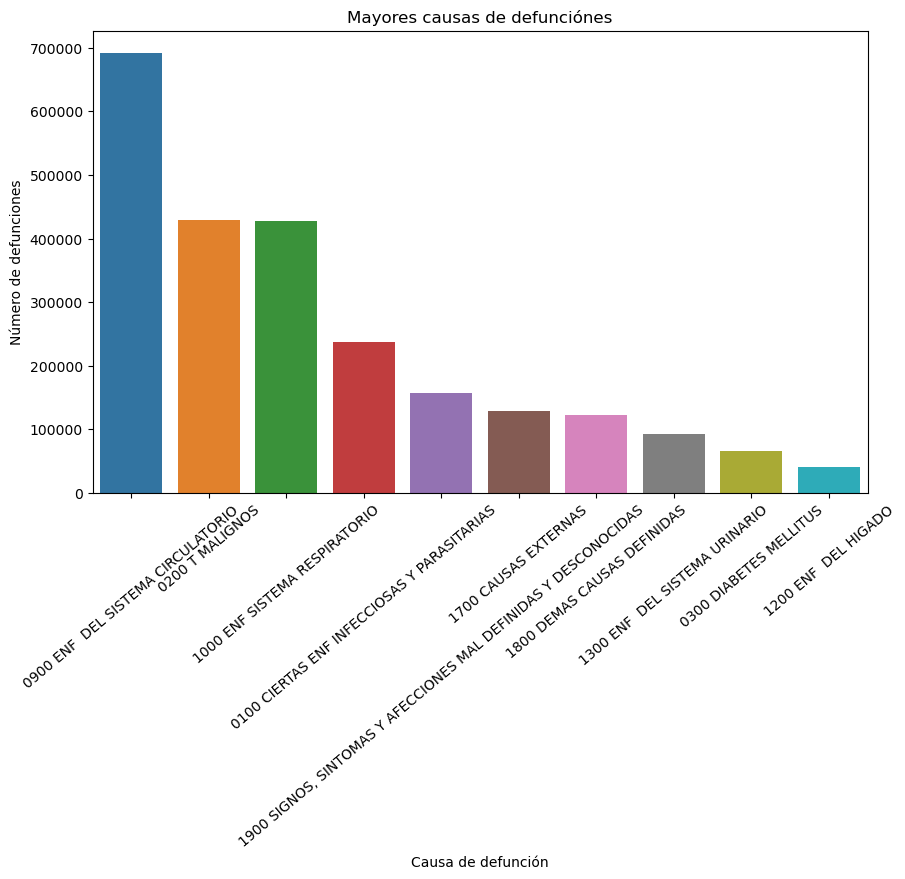

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x=causas_mayores.index, y=causas_mayores.values)
plt.xlabel("Causa de defunción")
plt.ylabel("Número de defunciones")
plt.title("Mayores causas de defunciónes")
plt.xticks(rotation=40)
plt.show()

In [54]:
encoder = LabelEncoder()

In [55]:
defunciones['region_encod'] = encoder.fit_transform(defunciones['region'])

In [56]:
print(defunciones[['region', 'region_encod']].head())

     region  region_encod
0  1.Centro             0
1  1.Centro             0
2  1.Centro             0
3  1.Centro             0
4  1.Centro             0


In [58]:
grupo_etario_counts = defunciones['grupo_etario_binning'].value_counts().sort_index()

KeyError: 'grupo_etario_binning'

In [60]:
plt.figure(figsize=(10, 6))
grupo_etario_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Defunciones por Grupo Etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Número de Defunciones')
plt.xticks(rotation=45)
plt.show()

NameError: name 'grupo_etario_counts' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Cande: graficos distribución de datos, (outliers?)
#¿Hay correlación entre features?


In [7]:
# Clara: armar repo ok
# renombrar columna, ok
# minimos y maximos de causas, años, sexo, ragos etarios, region
#graficos de analisis de causas en gral y causas por region (categorías principales?)

#PREGUNTAR: Analisis de correlacion entre variables?
#Redactar conclusión?